# **Group Assignment** - Bike Sharing

- `instant`: record index
- `dteday` : date
- `season` : season (1:springer, 2:summer, 3:fall, 4:winter)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

## PART I: Exploratory Data Analysis

### Data Import

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
import plotly.graph_objects as go

In [3]:
raw_data = pd.read_csv("data/bike-sharing_hourly.csv")

In [4]:
raw_data.head(200)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2011-01-09,1,0,1,10,0,0,0,1,0.14,0.1061,0.43,0.3881,0,49,49
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
197,198,2011-01-09,1,0,1,12,0,0,0,1,0.18,0.1364,0.37,0.4478,4,79,83
198,199,2011-01-09,1,0,1,13,0,0,0,1,0.20,0.1667,0.34,0.4478,6,69,75


#### Barplots

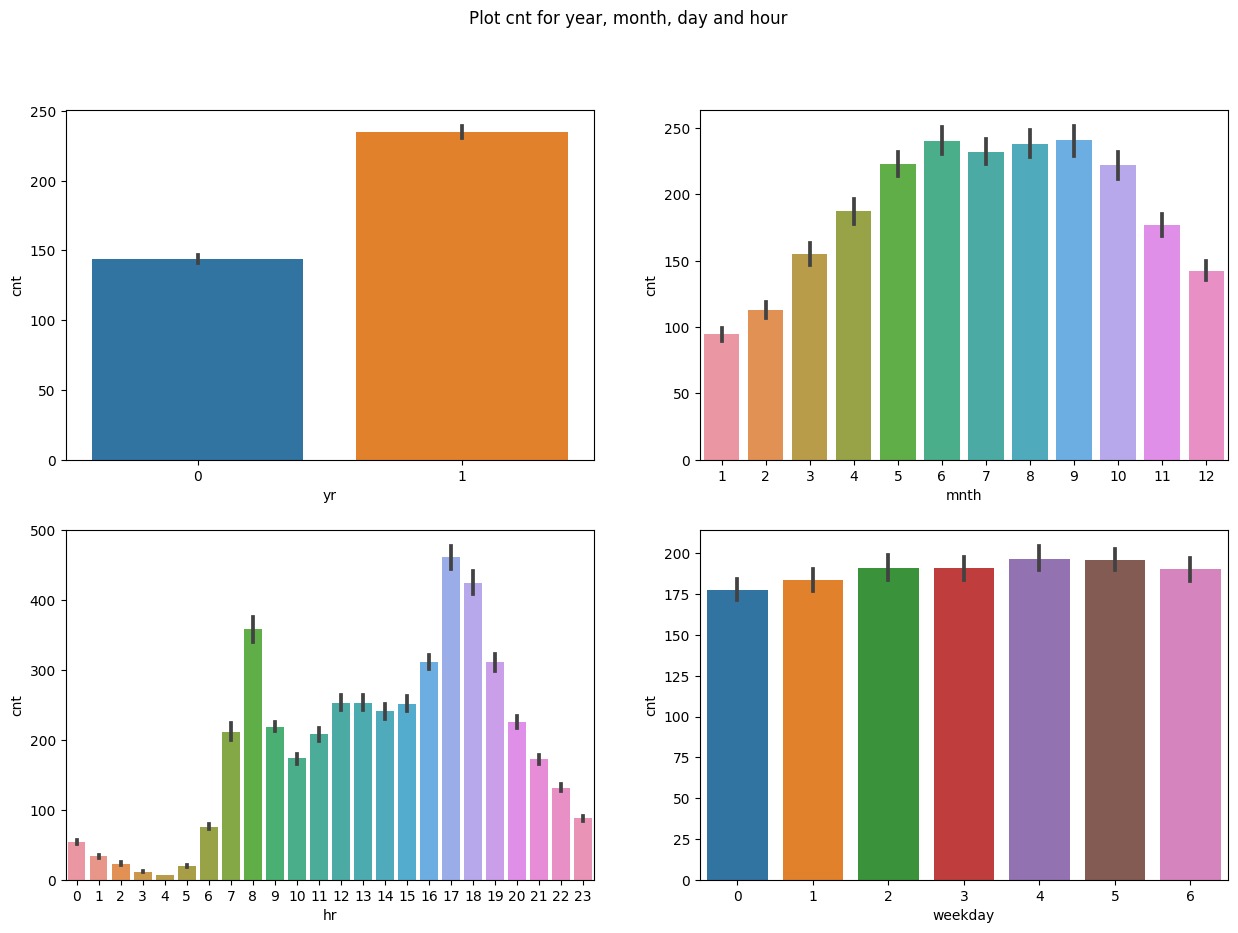

In [5]:
#Plots for the Year, Month, Day and Hour
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Plot cnt for year, month, day and hour')
sns.barplot(x="yr", y="cnt", data=raw_data, ax=axs[0, 0])
sns.barplot(x="mnth", y="cnt", data=raw_data, ax=axs[0, 1])
sns.barplot(x="hr", y="cnt", data=raw_data, ax=axs[1, 0])
sns.barplot(x="weekday", y="cnt", data=raw_data, ax=axs[1, 1])
  
plt.show()

#### Heatmap

/var/folders/jz/7k4lz9z91w92yqvc2ffzy2b80000gn/T/ipykernel_68838/1222961313.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


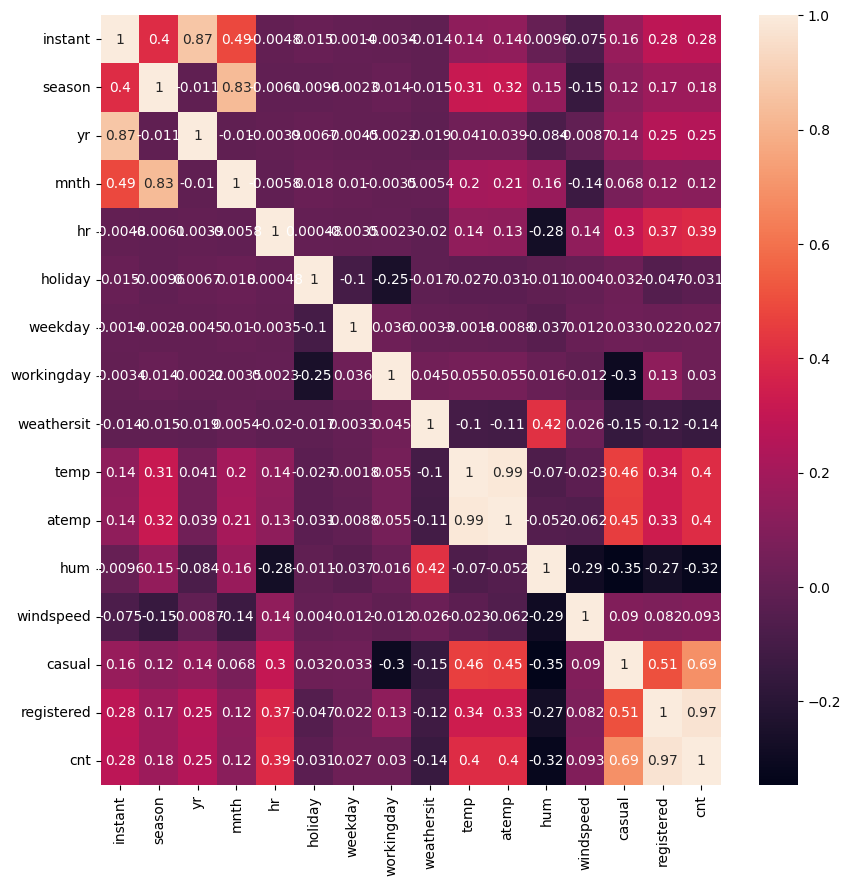

In [6]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(numeric_only=True), annot=True)
fig.show()

### info() and isnull()

We used the info() and isnull() function to check for null values and the Dtype for all the columns.

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
raw_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### describe()

We checked the max and min values for season, year, month, hour and weekday for anomalies such as month > 12 or hour > 23. Further

In [9]:
raw_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Missing Rows

We found out, that the dataset is missing some rows

In [10]:
raw_data.cnt.count()/24

724.125

In [11]:
# find all dates where are less than 24 hours
temp_data = raw_data.groupby('dteday').count().sort_values(by='hr', ascending=True)
 
# get all dates where are less than 24 hours
dates = temp_data[temp_data['hr'] < 24].index

# add missing hours to the dataset
for date in dates:
    for hour in range(24):
        if hour not in raw_data[raw_data['dteday'] == date]['hr'].values:
            raw_data = pd.concat([raw_data, pd.DataFrame({'instant': [raw_data['instant'].max() + 1], 'dteday': [date], 'hr': [hour]})])
             
# reset the index
raw_data = raw_data.sort_values(by="dteday").reset_index(drop=True)
raw_data['instant'] = raw_data.index + 1


In [12]:
raw_data.isnull().sum()

instant         0
dteday          0
season        165
yr            165
mnth          165
hr              0
holiday       165
weekday       165
workingday    165
weathersit    165
temp          165
atemp         165
hum           165
windspeed     165
casual        165
registered    165
cnt           165
dtype: int64

In [13]:
raw_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2,2011-01-01,1.0,0.0,1.0,23,0.0,6.0,0.0,2.0,0.46,0.4545,0.88,0.2985,15.0,24.0,39.0
2,3,2011-01-01,1.0,0.0,1.0,22,0.0,6.0,0.0,2.0,0.40,0.4091,0.94,0.2239,11.0,17.0,28.0
3,4,2011-01-01,1.0,0.0,1.0,21,0.0,6.0,0.0,2.0,0.40,0.4091,0.87,0.1940,3.0,31.0,34.0
4,5,2011-01-01,1.0,0.0,1.0,20,0.0,6.0,0.0,2.0,0.40,0.4091,0.87,0.2537,11.0,25.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,17540,2012-12-31,1.0,1.0,12.0,3,0.0,1.0,1.0,1.0,0.16,0.1818,0.59,0.1045,0.0,1.0,1.0
17540,17541,2012-12-31,1.0,1.0,12.0,1,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,6.0,13.0,19.0
17541,17542,2012-12-31,1.0,1.0,12.0,0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,4.0,30.0,34.0
17542,17543,2012-12-31,1.0,1.0,12.0,12,0.0,1.0,1.0,2.0,0.24,0.2273,0.56,0.1940,52.0,172.0,224.0


In [14]:
raw_data['dteday'] = pd.to_datetime(raw_data['dteday'])
raw_data['yr'] = raw_data['dteday'].dt.year
raw_data['mnth'] = raw_data['dteday'].dt.month
raw_data['weekday'] = raw_data['dteday'].dt.weekday
season = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['season'].mode()[0])
weathersit = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['weathersit'].mode()[0])
holiday = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['holiday'].mode()[0])
workingday= raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['workingday'].mode()[0])
temp = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['temp'].mean())
atemp = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['atemp'].mean())
hum = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['hum'].mean())
windspeed = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['windspeed'].mean())
casual = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['casual'].mean())
registered = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['registered'].mean())
cnt = raw_data.groupby('dteday', group_keys=True).apply(lambda x: x['cnt'].mean())

raw_data['season'] = raw_data['season'].fillna(raw_data['dteday'].map(season))
raw_data['weathersit'] = raw_data['weathersit'].fillna(raw_data['dteday'].map(weathersit))
raw_data['holiday'] = raw_data['holiday'].fillna(raw_data['dteday'].map(holiday)) 
raw_data['workingday'] = raw_data['workingday'].fillna(raw_data['dteday'].map(workingday))
raw_data['temp'] = raw_data['temp'].fillna(raw_data['dteday'].map(temp))
raw_data['atemp'] = raw_data['atemp'].fillna(raw_data['dteday'].map(atemp))
raw_data['hum'] = raw_data['hum'].fillna(raw_data['dteday'].map(hum))
raw_data['windspeed'] = raw_data['windspeed'].fillna(raw_data['dteday'].map(windspeed))
raw_data['casual'] = raw_data['casual'].fillna(raw_data['dteday'].map(casual))
raw_data['registered'] = raw_data['registered'].fillna(raw_data['dteday'].map(registered))
raw_data['cnt'] = raw_data['cnt'].fillna(raw_data['dteday'].map(cnt))

We've added the missing rows and filled the missing values for the categorical rows with the mode for each day and the numerical columns with the mean.

In [15]:
raw_data['season'] = raw_data['season'].astype('int')
raw_data['weathersit'] = raw_data['weathersit'].astype('int')
raw_data['holiday'] = raw_data['holiday'].astype('int')
raw_data['workingday'] = raw_data['workingday'].astype('int')
raw_data['casual'] = raw_data['casual'].astype('int')
raw_data['registered'] = raw_data['registered'].astype('int')
raw_data['cnt'] = raw_data['cnt'].astype('int')

In [16]:
data = raw_data
data = data.astype({
    "instant": "int64",
    "dteday": "datetime64[ns]",
    "season": "category",
    "yr": "category",
    "mnth": "category",
    "hr": "category",
    "holiday": "bool",
    "weekday": "category",
    "workingday": "bool",
    "weathersit": "category",
    "temp": "float64",
    "atemp": "float64",
    "hum": "float64",
    "windspeed": "float64",
    "casual": "int64",
    "registered": "int64",
    "cnt": "int64"
})

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17544 non-null  int64         
 1   dteday      17544 non-null  datetime64[ns]
 2   season      17544 non-null  category      
 3   yr          17544 non-null  category      
 4   mnth        17544 non-null  category      
 5   hr          17544 non-null  category      
 6   holiday     17544 non-null  bool          
 7   weekday     17544 non-null  category      
 8   workingday  17544 non-null  bool          
 9   weathersit  17544 non-null  category      
 10  temp        17544 non-null  float64       
 11  atemp       17544 non-null  float64       
 12  hum         17544 non-null  float64       
 13  windspeed   17544 non-null  float64       
 14  casual      17544 non-null  int64         
 15  registered  17544 non-null  int64         
 16  cnt         17544 non-

### Feature Engineering

In [18]:
dict_daylight = {
    1: 9.8,
    2: 10.82,
    3: 11.98,
    4: 13.26,
    5: 14.34,
    6: 14.93,
    7: 14.68,
    8: 13.75,
    9: 12.5,
    10: 11.25,
    11: 10.12,
    12: 9.5
}  

daylight_hrs = pd.DataFrame(dict_daylight.items(), columns=['mnth', 'daylight_hrs'])

data = data.join(daylight_hrs.set_index('mnth'), on='mnth')

data['daylight_hrs'] = data['daylight_hrs'].astype('float64')

#### Boxplots before removing the outliers

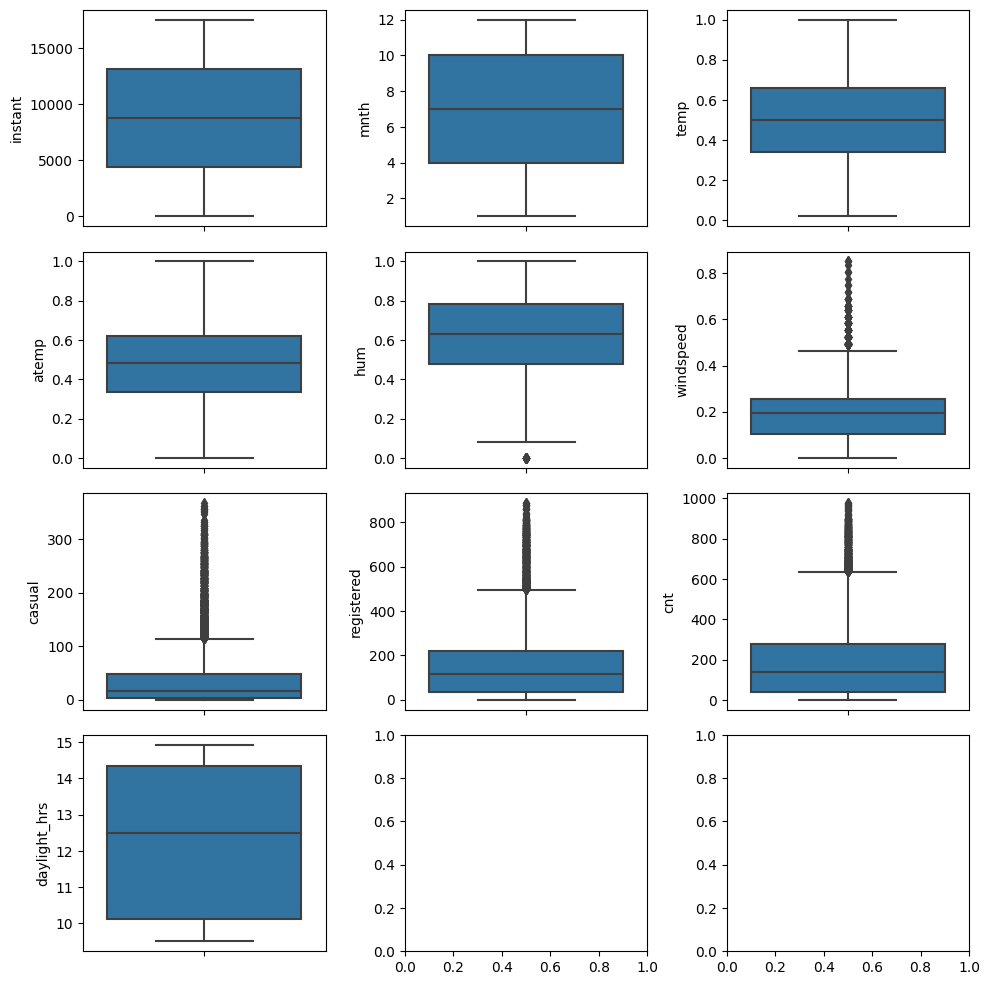

In [19]:
# Create subplots of all the numerical variables as boxplots
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(10, 10))

index = 0
axs = axs.flatten()

for key, value in data.select_dtypes(include=['float64', 'int64']).items():
    sns.boxplot(y=value, ax=axs[index])
    index += 1

# Show the subplots
plt.tight_layout()
plt.show()

### Outliers

As we figured out, there are a lot outliers in the casual and cnt column. We're deleting all rows that have a value greater than 2.5 * std()

In [20]:
data = data[np.abs(data["cnt"]-data["cnt"].mean())<=(2.5*data["cnt"].std())]

#### Boxplots after removing the outliers

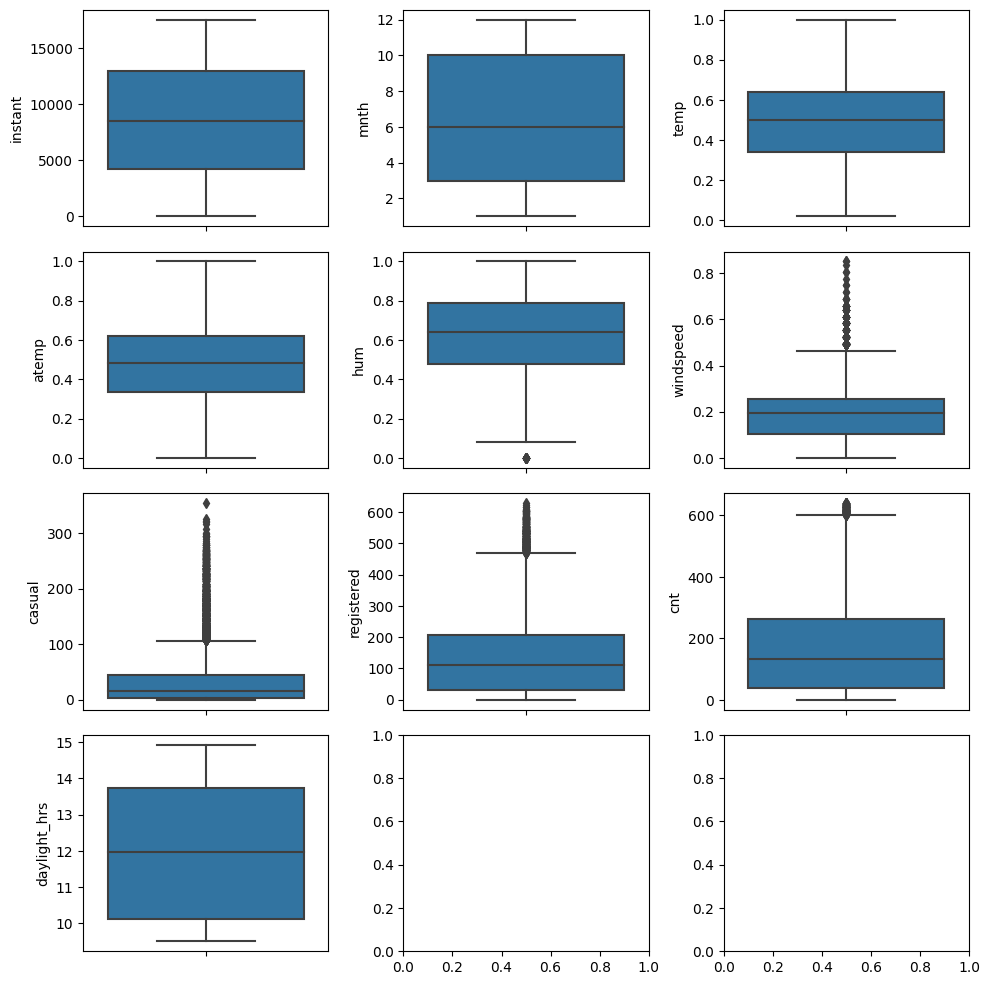

In [21]:
# Create subplots of all the numerical variables as boxplots
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(10, 10))

index = 0
axs = axs.flatten()

for key, value in data.select_dtypes(include=['float64', 'int64']).items():
    sns.boxplot(y=value, ax=axs[index])
    index += 1

# Show the subplots
plt.tight_layout()
plt.show()

[Text(0.5, 0, 'Holiday'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Holiday')]

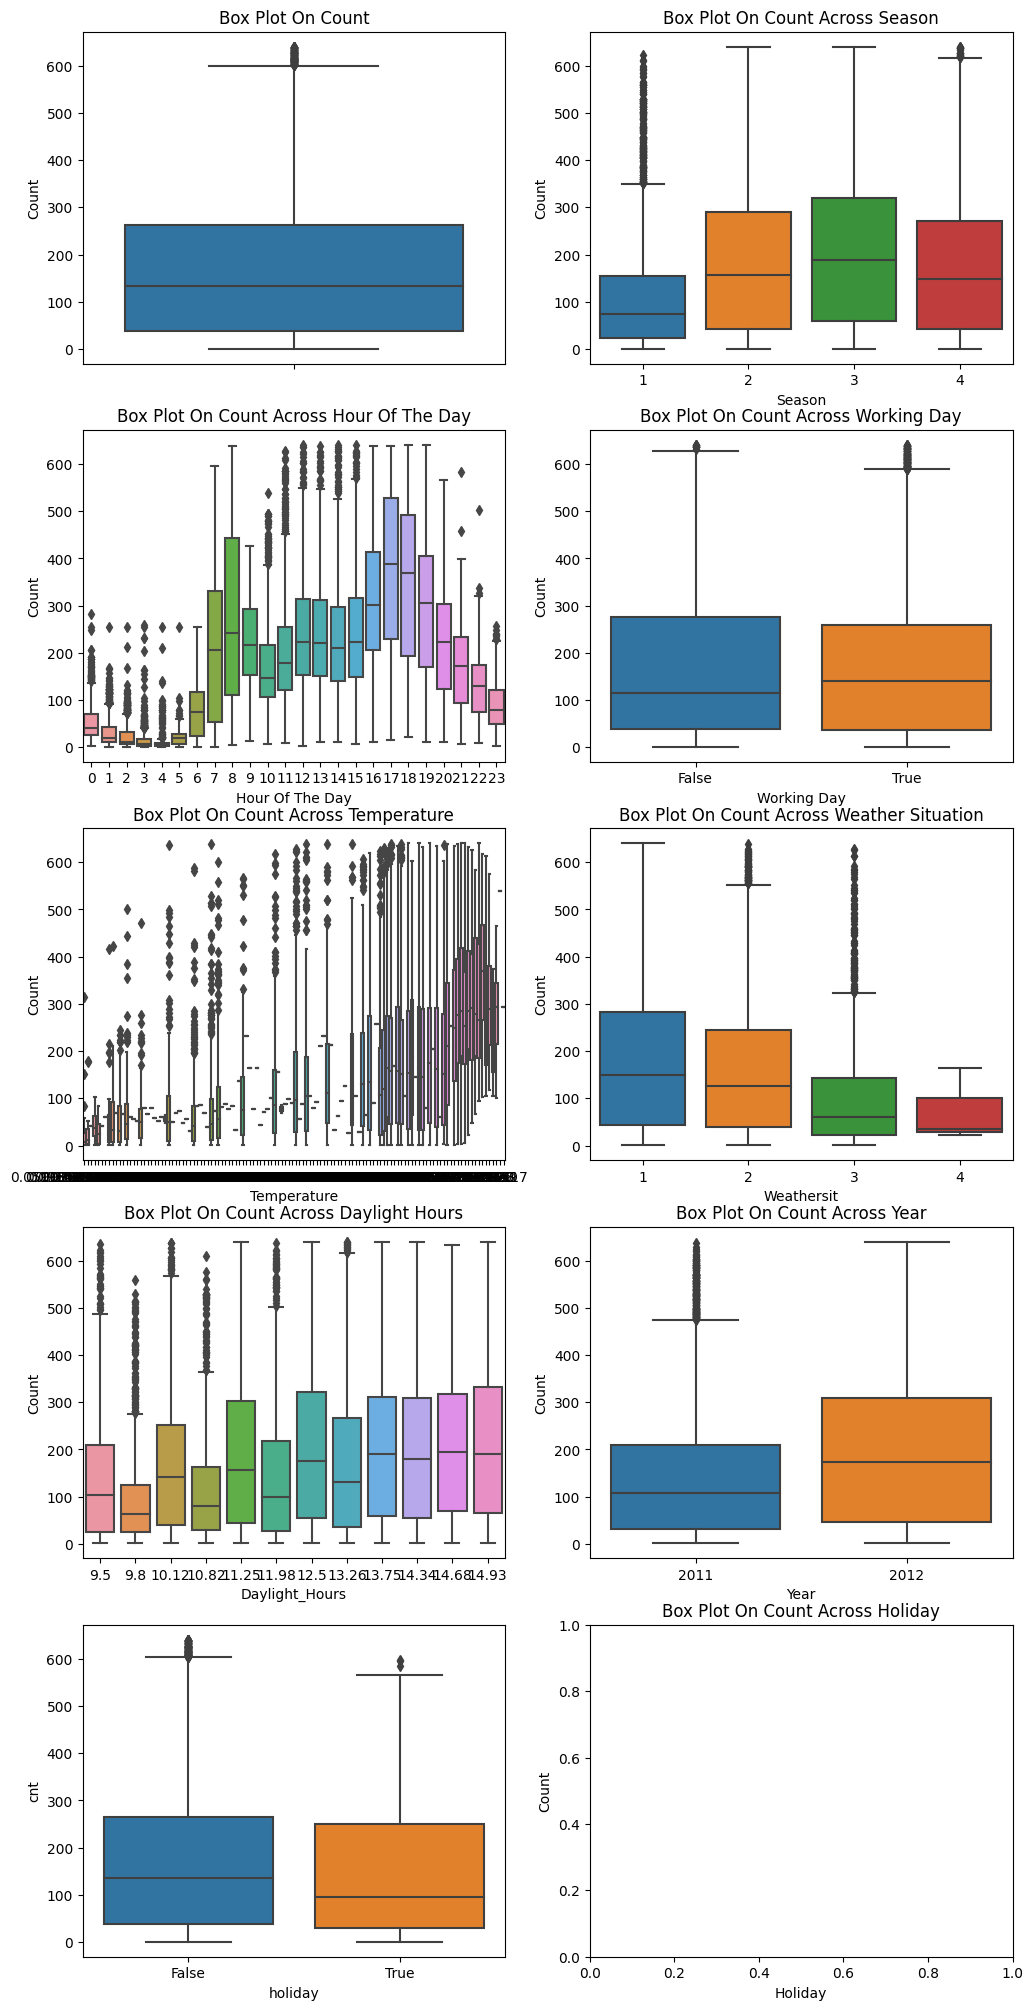

In [22]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 25)
sns.boxplot(data=data,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="cnt",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="cnt",x="hr",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="cnt",x="temp",orient="v",ax=axes[2][0])
sns.boxplot(data=data,y="cnt",x="weathersit",orient="v",ax=axes[2][1])
sns.boxplot(data=data,y="cnt",x="daylight_hrs",orient="v",ax=axes[3][0])
sns.boxplot(data=data,y="cnt",x="yr",orient="v",ax=axes[3][1])
sns.boxplot(data=data,y="cnt",x="holiday",orient="v",ax=axes[4][0])


axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")
axes[2][1].set(xlabel='Weathersit', ylabel='Count',title="Box Plot On Count Across Weather Situation")
axes[3][0].set(xlabel='Daylight_Hours', ylabel='Count',title="Box Plot On Count Across Daylight Hours")
axes[3][1].set(xlabel='Year', ylabel='Count',title="Box Plot On Count Across Year")
axes[4][1].set(xlabel='Holiday', ylabel='Count',title="Box Plot On Count Across Holiday")

In [23]:
data.to_csv("data/bike-sharing_hourly_cleaned.csv", index=False)

#### Data shown for Year, month, day and Year and Month subdivided in registered and casual

<AxesSubplot: title={'center': 'Year and Month'}, xlabel='yr,mnth'>

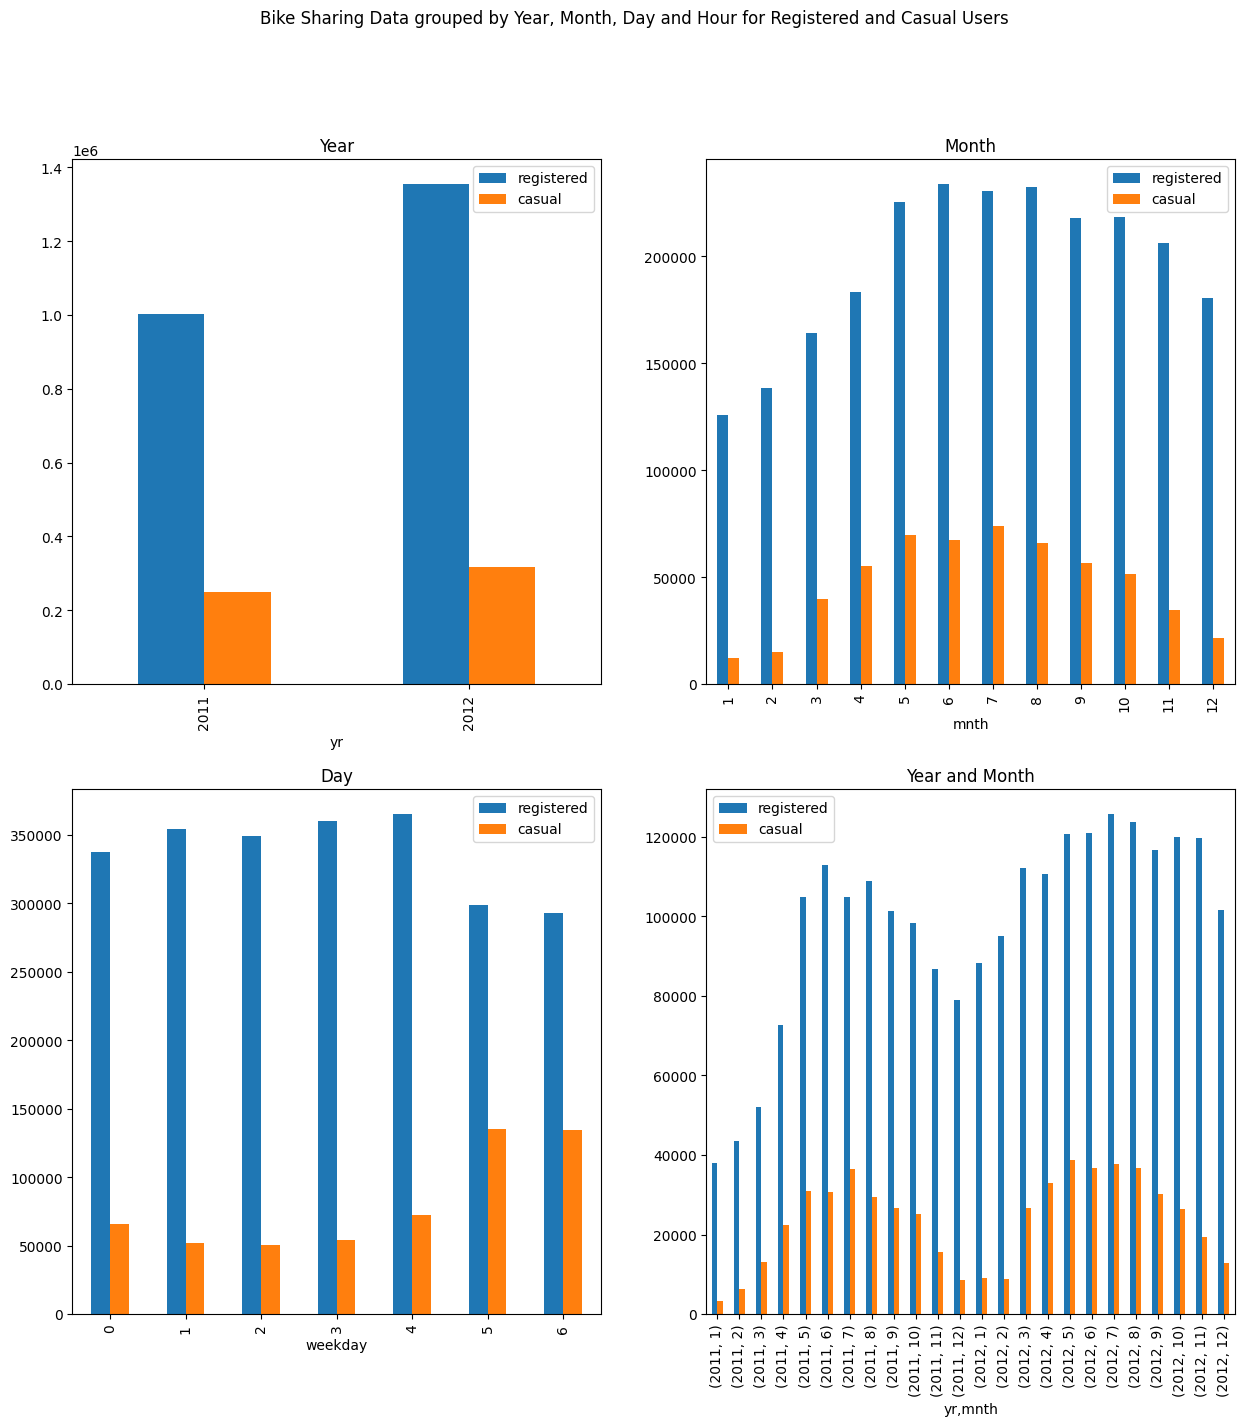

In [24]:
#Plots for the Year, Month, Day and Hour
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Bike Sharing Data grouped by Year, Month, Day and Hour for Registered and Casual Users')
 
data.groupby(["yr"])[["registered", "casual"]].sum().plot(kind="bar", ax=axs[0, 0], title="Year")
data.groupby(["mnth"])[["registered", "casual"]].sum().plot(kind="bar", ax=axs[0, 1], title="Month")
data.groupby("weekday")[["registered", "casual"]].sum().plot(kind="bar", ax=axs[1, 0], title="Day")
data.groupby(["yr", "mnth"])[["registered", "casual"]].sum().plot(kind="bar", ax=axs[1, 1], title="Year and Month")
 

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['dteday'], y=data['cnt'], mode='lines', name='cnt'))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Categorical Variables

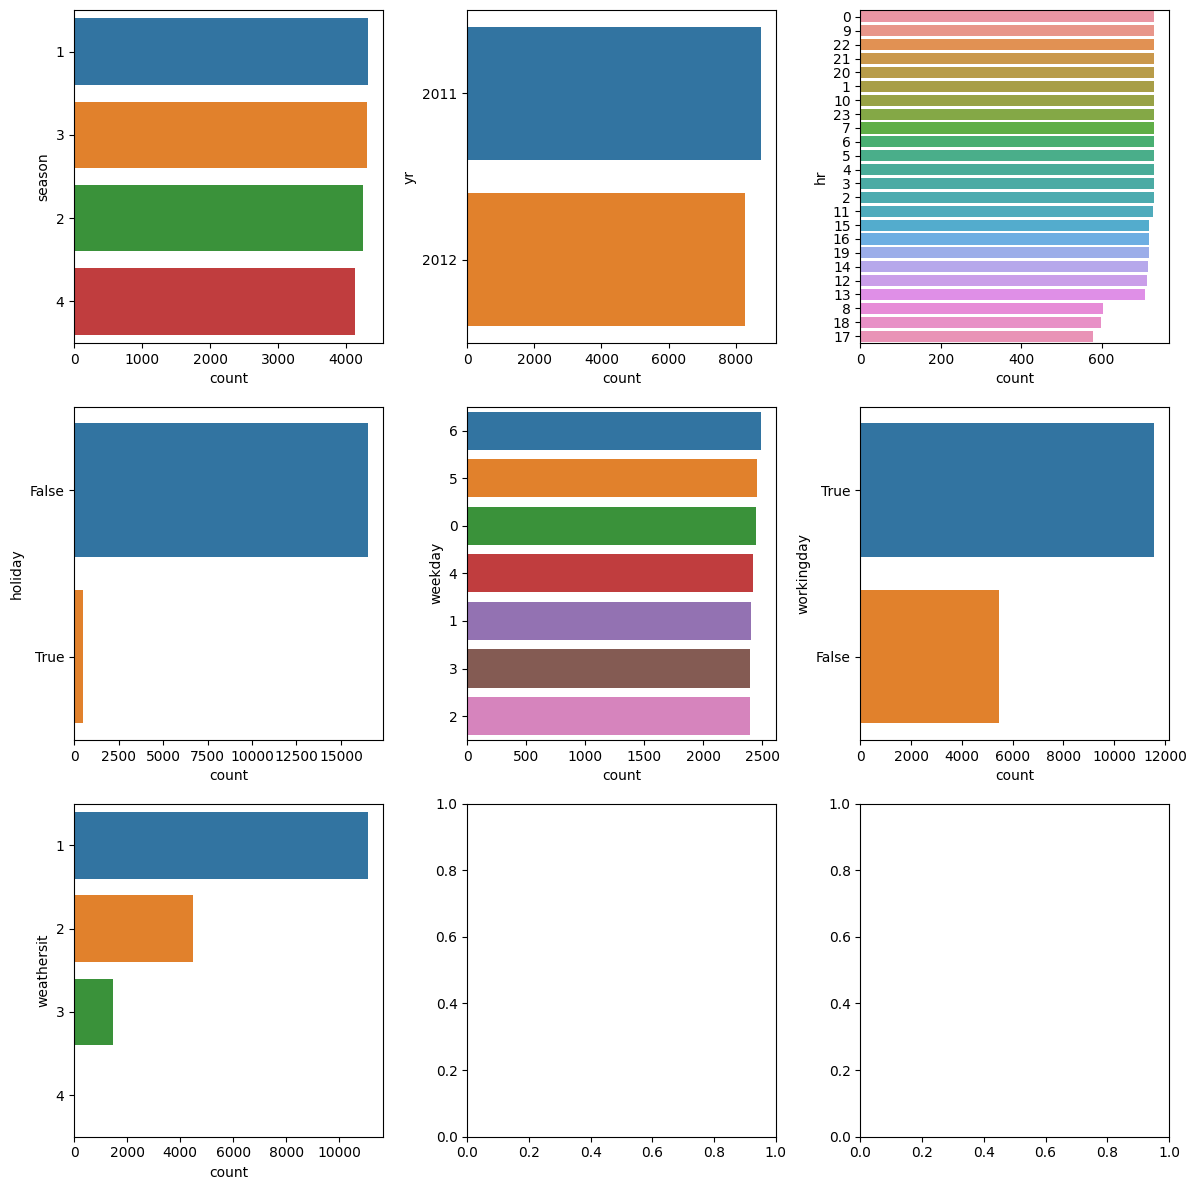

In [26]:
# Create subplots of all the categorical variables as barplots
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(12, 12))

index = 0
axs = axs.flatten()

for key, value in data.select_dtypes(include=['category', 'bool']).items():
    sns.countplot(y=value, ax=axs[index], order=data[key].value_counts().index)
    index += 1

# Show the subplots
plt.tight_layout()
plt.show()


Casuals are more likely in days with higher daylight_hrs. Registered customers don't have a high corr with the daylight_hrs

#### Getting dummies for the categorical columns

In [27]:
season = pd.get_dummies(data['season'], prefix='season')
data = pd.concat([data, season], axis=1)
weather=pd.get_dummies(data['weathersit'],prefix='weathersit')
data=pd.concat([data,weather],axis=1)
weekday=pd.get_dummies(data['weekday'],prefix='weekday')
data=pd.concat([data,weekday],axis=1)
month = pd.get_dummies(data['mnth'], prefix='mnth')
data = pd.concat([data, month], axis=1)
hours = pd.get_dummies(data['hr'], prefix='hr')
data = pd.concat([data, hours], axis=1)
year = pd.get_dummies(data['yr'], prefix='yr')
data = pd.concat([data, year], axis=1)
data['daylight'] = data['hr'].map(lambda x: 1 if (x > 6) & (x < 20) else 0)
data['night_hr'] = data['hr'].map(lambda x: 0 if (x < 7 | x == 23) else 1)
data['peak_hr'] = data['hr'].map(lambda x: 1 if x in [7,8,9,16,17,18,19] else 0)
data.drop(['season','weathersit', "weekday", "registered", "mnth", "dteday", "temp", "instant", "casual", "hr", "yr"],inplace=True,axis=1)
data

,holiday,workingday,atemp,hum,windspeed,cnt,daylight_hrs,season_1,season_2,season_3,...,hr_19,hr_20,hr_21,hr_22,hr_23,yr_2011,yr_2012,daylight,night_hr,peak_hr
0,False,False,0.2879,0.81,0.0000,16,9.8,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,False,False,0.4545,0.88,0.2985,39,9.8,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,False,False,0.4091,0.94,0.2239,28,9.8,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,False,False,0.4091,0.87,0.1940,34,9.8,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,False,False,0.4091,0.87,0.2537,36,9.8,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,False,True,0.1818,0.59,0.1045,1,9.5,1,0,0,...,0,0,0,0,0,0,1,0,1,0
17540,False,True,0.1818,0.55,0.1940,19,9.5,1,0,0,...,0,0,0,0,0,0,1,0,1,0
17541,False,True,0.1818,0.55,0.1940,34,9.5,1,0,0,...,0,0,0,0,0,0,1,0,1,0
17542,False,True,0.2273,0.56,0.1940,224,9.5,1,0,0,...,0,0,0,0,0,0,1,1,1,0


In [28]:
data.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'daylight_hrs', 'season_1', 'season_2', 'season_3', 'season_4',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'yr_2011', 'yr_2012', 'daylight', 'night_hr', 'peak_hr'],
      dtype='object')

#### Heatmap after removing the dummy enconding

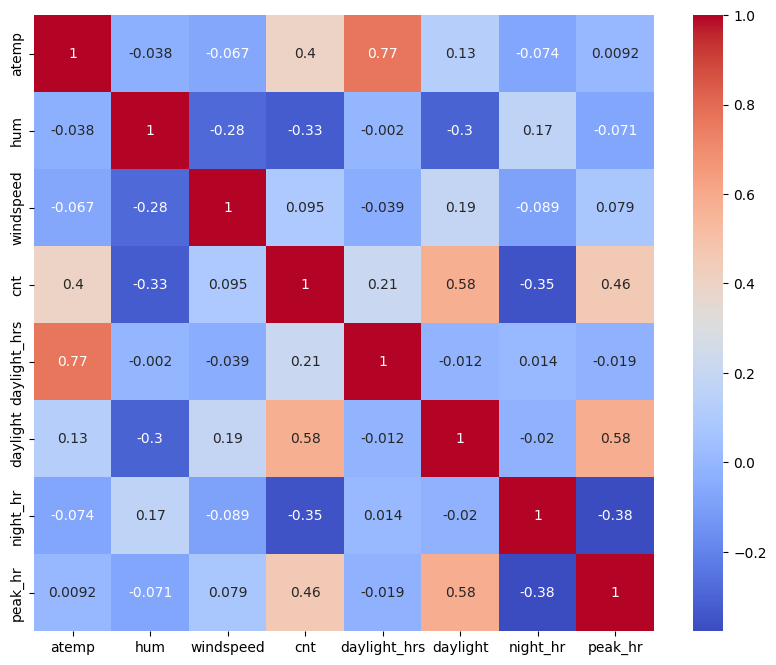

In [29]:
plt.figure(figsize=(10, 8))
num_values = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(num_values.corr(), annot=True, cmap='coolwarm')
plt.show()

These are the variables we're keeping plus the dummy encoded ones. 

## PART II: Prediction Model

In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data.drop('cnt',axis=1),data['cnt'],test_size=0.25,random_state=42)

### Testing different Regressors for the best RMSE

In [31]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
import xgboost as xbg
from sklearn.pipeline import Pipeline

In [32]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor(), DecisionTreeRegressor(), SVR(), xbg.XGBRegressor()]

model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR', 'XGBRegressor']

rmse=[]
d={}

for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    try:
        rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    except:
        print("Error in ",model_names[model])
        
res={'Modelling Algo':model_names,'RMSE':rmse}   
res

KeyboardInterrupt: 

In [ ]:
rmsle_frame=pd.DataFrame(res)
rmsle_frame.to_csv("data/rmse_frame.csv",index=False)

#### Plotting the RMSE for all the regressors

As the RandomForestRegressor has the lowest RMSE Score we chose this one to further tune

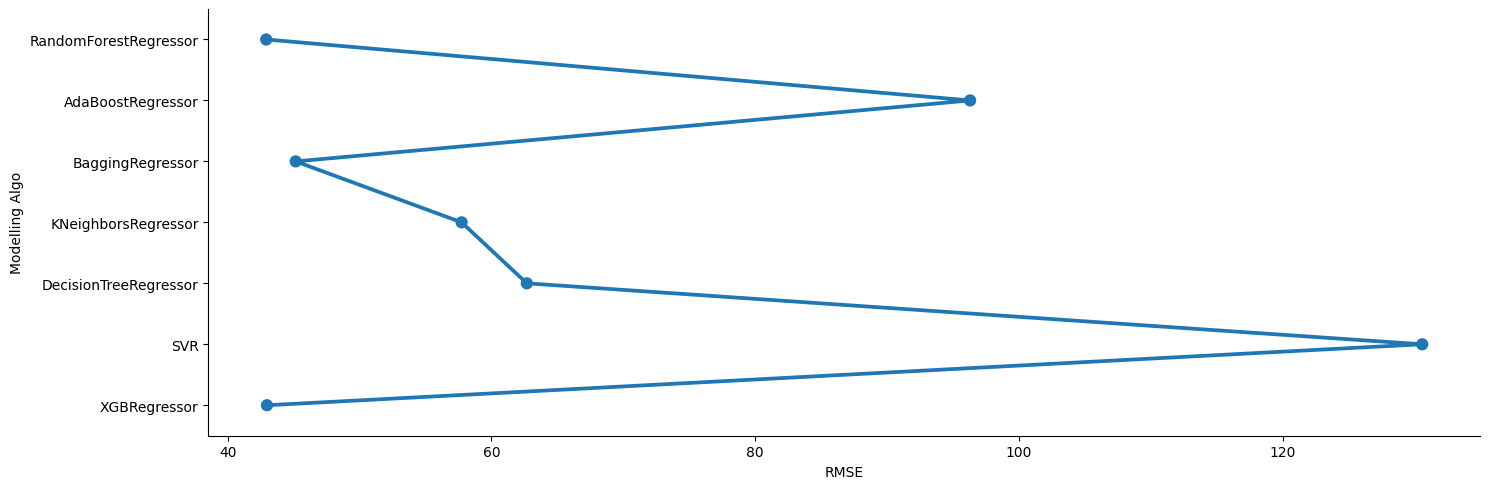

In [ ]:
sns.catplot(y='Modelling Algo',x='RMSE',data=rmsle_frame, kind='point',height=5,aspect=3)

### XGBoost

In [33]:
reg = xbg.XGBRegressor(n_estimators=3000, early_stopping_rounds=300, learning_rate=0.05, n_jobs=-1)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_test, y_test)], verbose=100)

[0]	validation_0-rmse:220.76626	validation_1-rmse:218.24374
[100]	validation_0-rmse:43.30819	validation_1-rmse:49.96639
[200]	validation_0-rmse:36.26494	validation_1-rmse:45.85897
[300]	validation_0-rmse:32.19980	validation_1-rmse:43.96540
[400]	validation_0-rmse:30.15034	validation_1-rmse:43.26954
[500]	validation_0-rmse:28.47950	validation_1-rmse:42.78793
[600]	validation_0-rmse:26.86211	validation_1-rmse:42.43213
[700]	validation_0-rmse:25.60952	validation_1-rmse:42.17892
[800]	validation_0-rmse:24.41526	validation_1-rmse:41.93867
[900]	validation_0-rmse:23.03742	validation_1-rmse:41.60612
[1000]	validation_0-rmse:21.89883	validation_1-rmse:41.48540
[1100]	validation_0-rmse:21.00064	validation_1-rmse:41.50289
[1200]	validation_0-rmse:19.89315	validation_1-rmse:41.32478
[1300]	validation_0-rmse:19.30675	validation_1-rmse:41.31454
[1400]	validation_0-rmse:18.67082	validation_1-rmse:41.27969
[1500]	validation_0-rmse:18.01281	validation_1-rmse:41.28901
[1600]	validation_0-rmse:17.20535	

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=300,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3000, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

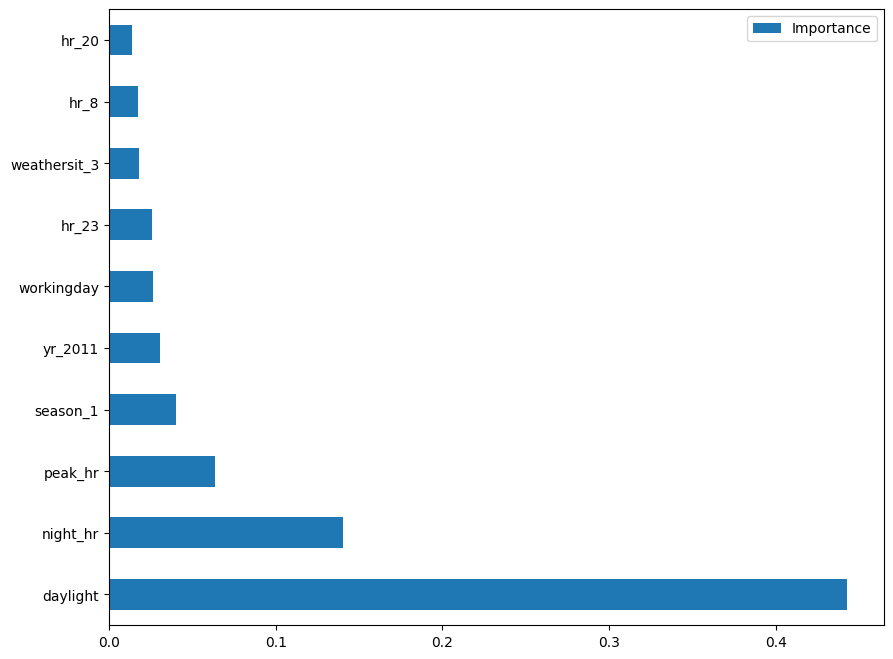

In [ ]:
feat_importances = pd.DataFrame(data = reg.feature_importances_,
             index = x_train.columns,
             columns = ['Importance']).sort_values(by = 'Importance', ascending = False).head(10)
feat_importances.plot(kind = 'barh', figsize = (10, 8))
feat_importances.to_csv("data/feat_importances.csv")

In [ ]:
pd.DataFrame({'Actual': y_test, 'Predicted': reg.predict(x_test)})

,Actual,Predicted
5639,344,321.241150
15284,10,15.885186
5772,547,523.750305
8319,124,128.221786
4672,130,124.757973
...,...,...
12709,198,189.904984
16120,262,256.281677
11603,322,421.619659
8353,20,14.494552


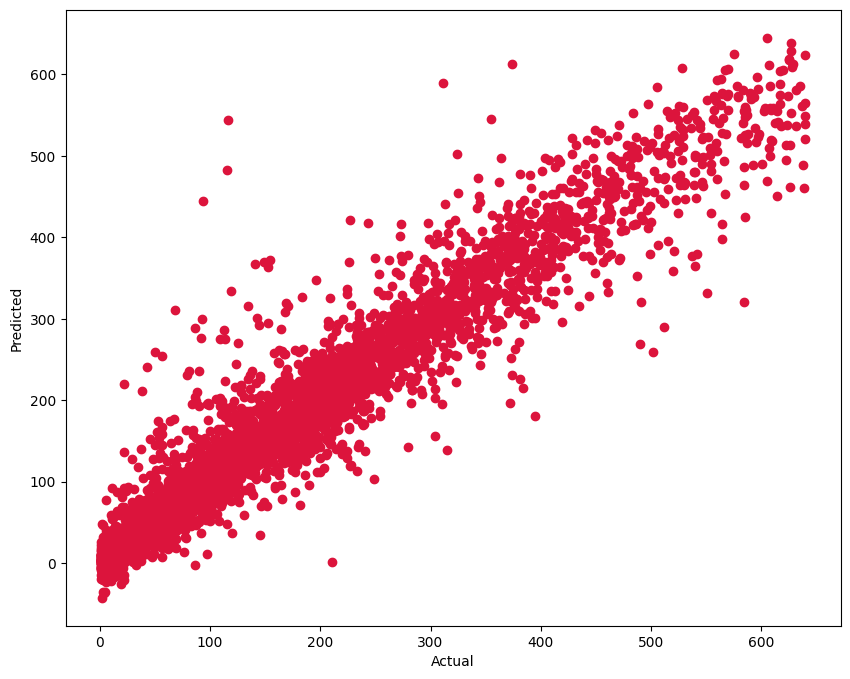

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, reg.predict(x_test), c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
reg.best_score

41.17558627724203

### Randomforest

#### RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score


In [ ]:
model = RandomForestRegressor()

parameters = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [i for i in range(1, 10, 1)],
    'min_samples_split': [i for i in range(1, 10, 1)],
    'n_estimators': [i for i in range(100, 500, 50)],
    'random_state': [42],
}

rand_rfm = RandomizedSearchCV(
    model,                               
    param_distributions = parameters,    
    scoring="neg_mean_squared_log_error",                 
    cv=3,                             
    refit=True,                                               
    return_train_score=True,            
    n_iter=100,
    n_jobs=-1,                          
)

In [ ]:
rand_rfm.fit(x_train, y_train)

KeyboardInterrupt: 

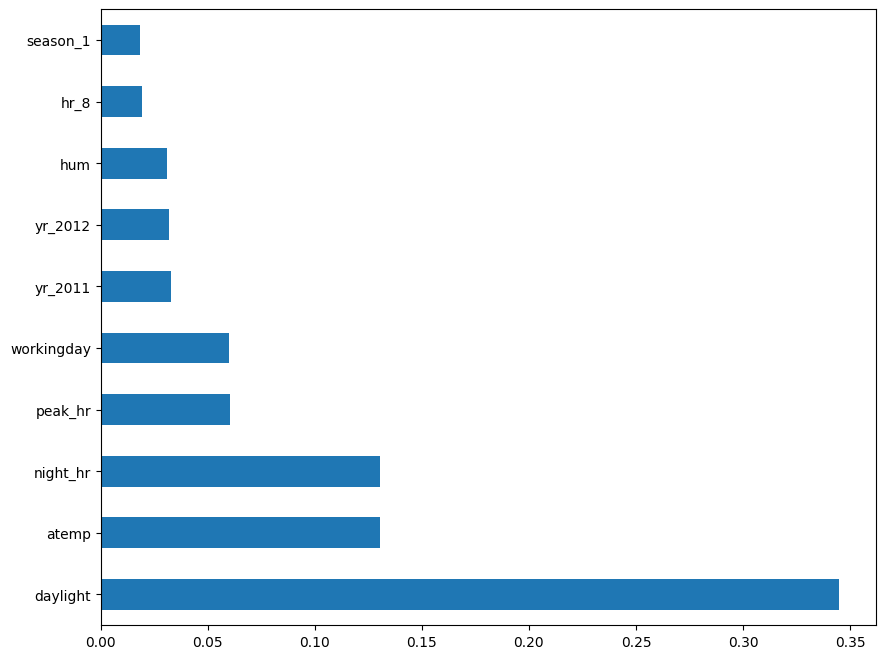

In [ ]:
plt.figure(figsize=(10, 8))
feat_importances = pd.Series(rand_rfm.best_estimator_.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

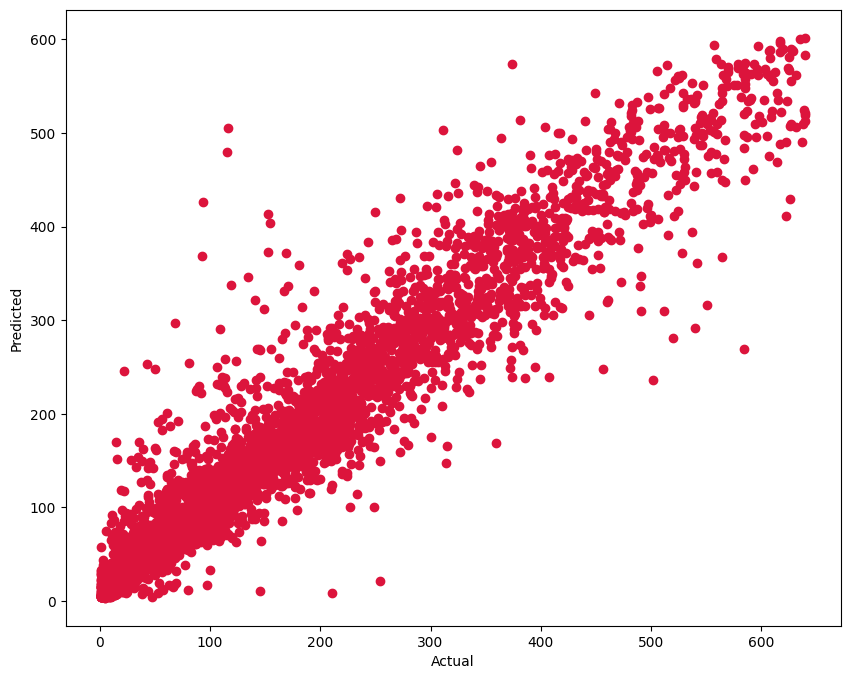

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, rand_rfm.predict(x_test), c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### GridSearchCV

In [ ]:
params_dict={'n_estimators': [100, 200, 400, 600],
            'max_features':['sqrt','log2'],
            'max_depth': [10, 20, 30],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'bootstrap': [True, False]
             }

grid_rfm=GridSearchCV(estimator=RandomForestRegressor()
                    ,param_grid=params_dict
                    ,scoring='neg_mean_squared_log_error'
                    ,n_jobs=-1
                    ,cv=3)

grid_rfm.fit(x_train,y_train)

pred_rf=grid_rfm.predict(x_test)

/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



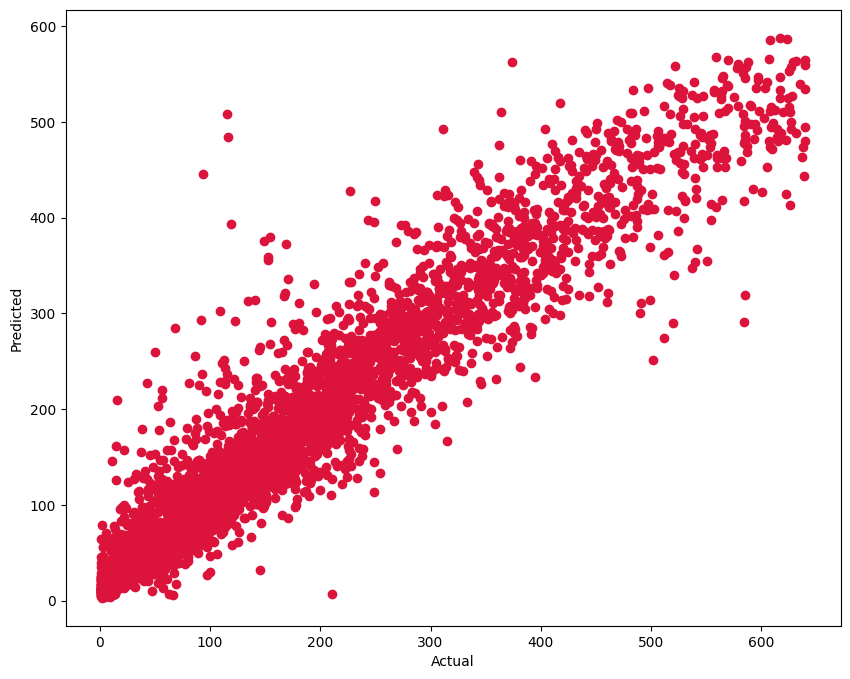

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, grid_rfm.predict(x_test), c='crimson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#### Compare the Scores for each Model

In [ ]:
# calculate RMSE for the three models
print(f"XGB RMSE: {np.sqrt(mean_squared_error(y_test, reg.predict(x_test)))}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, rand_rfm.predict(x_test)))}")
print(f"Grid Search RMSE: {np.sqrt(mean_squared_error(y_test, grid_rfm.predict(x_test)))}")


XGB RMSE: 41.1755863014488


NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### Save the model as .sav file for the Streamlit

In [ ]:
filename = 'models/model.sav'
pickle.dump(reg, open(filename, 'wb'))